# Ejercicio Práctico de Koalas

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark
from pyspark import pandas as ks

C:\Spark\spark-3.5.0-bin-hadoop3\python\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
# import databricks.koalas as ks

### Funciones básicas

In [3]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ks.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [5]:
## Ordena kser por el index
kser.sort_index()
kser

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf
kdf = ks.from_pandas(pdf)
pdf


,A,B
0,0.168088,0.103280
1,0.440777,0.669950
2,0.056192,0.784844
3,0.124339,0.023440
4,0.793665,0.900751


### Visualización de datos

In [7]:
## Describe los datos de kdf
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.316612,0.496453
std,0.304074,0.404677
min,0.056192,0.023440
25%,0.124339,0.103280
50%,0.168088,0.669950
75%,0.440777,0.784844
max,0.793665,0.900751


In [8]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by='B')

,A,B
3,0.124339,0.023440
0,0.168088,0.103280
1,0.440777,0.669950
2,0.056192,0.784844
4,0.793665,0.900751


In [10]:
## Transpon los datos de kdf
kdf.T


,0,1,2,3,4
A,0.168088,0.440777,0.056192,0.124339,0.793665
B,0.103280,0.669950,0.784844,0.023440,0.900751


### Selección

In [15]:
## Selecciona las varaibles A y B de Kdf
A = kdf.loc[:, "A"]
B = kdf.loc[:, "B"]
print(A)
print(B)

0    0.168088
1    0.440777
2    0.056192
3    0.124339
4    0.793665
Name: A, dtype: float64
0    0.103280
1    0.669950
2    0.784844
3    0.023440
4    0.900751
Name: B, dtype: float64


In [17]:
## Selecciona las filas 1, 2 de kdf
kdf[1:3]

,A,B
1,0.440777,0.669950
2,0.056192,0.784844


In [19]:
## Selecciona las filas 0, 1 y 2 de la variable B
kdf.loc[:3, "B"]

0    0.103280
1    0.669950
2    0.784844
3    0.023440
Name: B, dtype: float64

### Aplicando funciones de Python a Koalas

In [21]:
## Aplica la funcion de Python de np.cumsum a kdf
# np.cumsum(kdf)
kdf.cumsum()

,A,B
0,0.168088,0.103280
1,0.608865,0.773230
2,0.665057,1.558073
3,0.789397,1.581514
4,1.583062,2.482265


In [22]:
## Eleva al cuadrado los valores de kdf
kdf.pow(2)

,A,B
0,0.028254,0.010667
1,0.194285,0.448834
2,0.003158,0.615979
3,0.015460,0.000549
4,0.629904,0.811353


### Agrupando datos

In [23]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A', 'B']).sum()

C:\Spark\spark-3.5.0-bin-hadoop3\python\pyspark\pandas\groupby.py:893: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


,
A,B
0.168088,0.103280
0.440777,0.669950
0.056192,0.784844
0.124339,0.023440
0.793665,0.900751


### Generando gráficos

In [106]:
# This is needed for visualizing plot on notebook
%matplotlib inline

<Axes: >

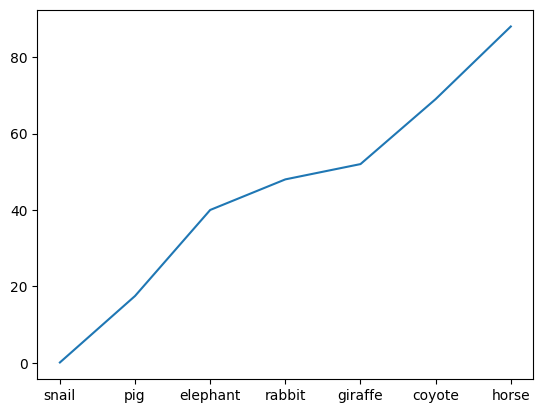

In [29]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

kdf = ks.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

## Genera un grafico de barras con kdf y matplotlib
ks.options.plotting.backend = "matplotlib"

kdf.loc[:, "speed"].plot()

C:\Spark\spark-3.5.0-bin-hadoop3\python\pyspark\pandas\plot\matplotlib.py:859: FutureWarning: Argument `sort_columns` will be removed in 4.0.0.
  warnings.warn(


AttributeError: Line2D.set() got an unexpected keyword argument 'sort_columns'

c:\Users\ferna\.conda\envs\bigdata-38\lib\site-packages\matplotlib\transforms.py:2665: RuntimeWarning: divide by zero encountered in scalar divide
  x_scale = 1.0 / inw
c:\Users\ferna\.conda\envs\bigdata-38\lib\site-packages\matplotlib\transforms.py:2667: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx = np.array([[x_scale, 0.0    , (-inl*x_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy s

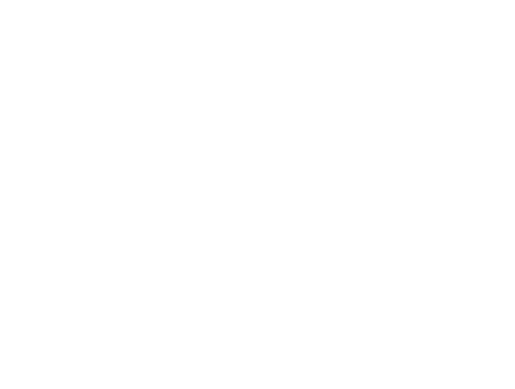

In [31]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))
ks.options.plotting.backend = "matplotlib"
## Genera un grafico de areas con kdf y matplotlib


### Utilizando SQL en Koalas

In [34]:
"""

NOTA PARA EL PROFESOR. 

Koalas fue deprecado para la version 3.2 de Pyspark, https://spark.apache.org/docs/latest/api/python/migration_guide/koalas_to_pyspark.html
Revisando la guia se sugiere que se utilice pyspark.pandas en vez de databricks.koalas. Es fue el metodo que utilice para evitar instalar 
una version menor de Spark en mi sistema. Sin embargo, funciones simples disponibles en koalas no estan disponibles para pyspark.pandas, como 
filtros por medio de SQL por ende tuve que utilizar lambda y assign.

"""


kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [42]:
## Con una consulta SQL selecciona los datos donde pig sea mayor que 100
kdf[kdf['pig'] > 100]


,year,pig,horse
2,2003,489,281
3,2009,675,600
4,2014,1776,1900


In [43]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [125]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken
"""
INNER JOIN NO ES POSIBLE CON PYSPARK.PANDAS
"""



### Trabajando con PySpark

In [45]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

## Convierete el dataframe de Koalas a Dataframe de Spark
type(kdf)

pyspark.pandas.frame.DataFrame

In [46]:
## muestra los datos
kdf

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
